# Question 1

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy


df=pd.read_csv('Automobile_data.csv')

df=df.drop(columns=['normalized-losses']) #too many missing values
df['num-of-cylinders']=df['num-of-cylinders'].replace({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})

df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [461]:
for col in df.columns:
    df=df[df[col]!='?']

#features
columns=df.columns 
#data types of features, price (y value) is omitted
dtype=['o','n','n','n','n','n','n','n','c','c','c','c','c','n','c','c','n','c','c','c','c','c','c','c']
new_order=[]

dtypes={}
for i in range(len(dtype)):
    dtypes[columns[i]]=dtype[i]  #dictionary for the data-types
    if dtype[i]=='c' or dtype[i]=='o':
        df[columns[i]]=df[columns[i]].astype(float)  #correct dtype
        df[columns[i]]=round((df[columns[i]]-min(df[columns[i]]))/(max(df[columns[i]])-min(df[columns[i]])),8)  #range normalise
        new_order.append(columns[i])

#reordering
for item in columns:
    if item not in new_order:
        new_order.append(item)
df=df[new_order]

df['price']=df['price'].astype(int)

df

C:\Users\samru\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,mpfi,13495
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,mpfi,16500
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.333333,0.343396,0.100000,0.666667,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,mpfi,16500
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.111111,0.181132,0.464286,0.633333,...,audi,gas,std,four,sedan,fwd,front,ohc,mpfi,13950
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.222222,0.283019,0.464286,0.633333,...,audi,gas,std,four,sedan,4wd,front,ohc,mpfi,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.735043,0.641667,0.567882,0.111111,0.301887,0.885714,0.514286,...,volvo,gas,std,four,sedan,rwd,front,ohc,mpfi,16845
201,0.2,0.655977,0.711940,0.726496,0.641667,0.605508,0.111111,0.301887,0.885714,0.514286,...,volvo,gas,turbo,four,sedan,rwd,front,ohc,mpfi,19045
202,0.2,0.655977,0.711940,0.735043,0.641667,0.591156,0.333333,0.422642,0.742857,0.380952,...,volvo,gas,std,four,sedan,rwd,front,ohcv,mpfi,21485
203,0.2,0.655977,0.711940,0.735043,0.641667,0.670675,0.333333,0.316981,0.335714,0.633333,...,volvo,diesel,turbo,four,sedan,rwd,front,ohc,idi,22470


In [235]:
def train_test_split(df,p=0.8,random_state=None):

    df_split=df.sample(frac=1,random_state=random_state)   #shuffle
    split_val=int(len(df_split)*(p))   #split into train and test
    n=len(df_split.columns)  #number of features

    X_train=df_split[:split_val].to_numpy()[:,:n-1]
    y_train=df_split[:split_val].to_numpy()[:,n-1]
    X_test=df_split[split_val:].to_numpy()[:,:n-1]
    y_test=df_split[split_val:].to_numpy()[:,n-1]
    
    return X_train,X_test,y_train,y_test

In [236]:
def distance(train,test,dist_type):
    
    #nominal values
    nom_dist=np.sum(train[:,15:]!=test[15:],axis=1)
    #continuous values
    if dist_type=='Euclidian':
        squared_dist=(train[:,:15]-test[:15])**2
        cont_dist=np.sum(np.sqrt(squared_dist.astype(float)), axis=1)
    if dist_type=='Manhattan':
        abs_dist=abs(train[:,:15]-test[:15])**2
        cont_dist=np.sum(abs_dist, axis=1)
        
    return cont_dist+nom_dist

In [237]:
def knn(X_train,X_test,y_train,y_test,k,dist_type='Euclidian'):
    
    predictions=[]
    n=len(X_test)
    for i in range(n):
        d=distance(X_train,X_test[i],dist_type)  #calculate distance

        nearest_neighbours=y_train[np.argsort(d)[:k]] #find nearest neighbours
        yhat=round(np.mean(nearest_neighbours))   #predicted y (mean of nearest neighbours)
        y=y_test[i]
        predictions.append([y,yhat])  
        
    return np.array(predictions)

####  K-nearest neighbors predictions

Root mean squared error =  1862.72
The error is 14.02 of the mean price


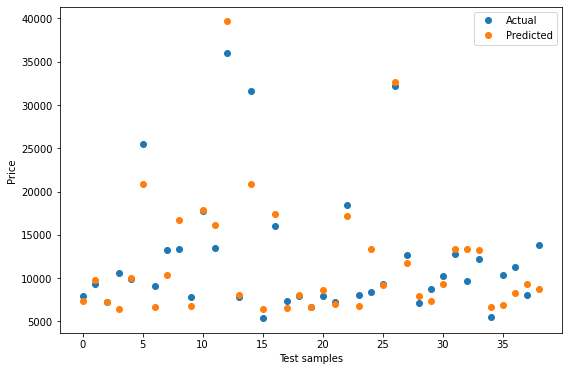

In [492]:
X_train,X_test,y_train,y_test=train_test_split(df)

pred=knn(X_train,X_test,y_train,y_test,k=5)
rmse=np.mean(np.sqrt((pred[:,0]-pred[:,1])**2))    #difference between predicted and actual y
mean_price=np.mean(df['price'])
print('Root mean squared error = ',round(rmse,2))
print(f'The error is {round((rmse/mean_price)*100,2)} of the mean price')

plt.figure(figsize=(9,6))
plt.plot(pred[:,0],'o',label='Actual')
plt.plot(pred[:,1],'o',label='Predicted')
plt.legend()
plt.xlabel('Test samples')
plt.ylabel('Price')
plt.show()

As we can see, the predicted values are reasonable estimates of the actual values. Deviations at large values have a strong effect on the error.

### Cross validation

In [493]:
def k_fold(X_train_og,y_train_og,k,dist_type='Euclidian',k_fold=10):
    errors=[]

    for i in range(k_fold):   #iterative split for k_fold times

        X=copy.deepcopy(X_train_og)  #store original X  and y values
        y=copy.deepcopy(y_train_og)

        start=i*int(len(X_train_og)/k_fold)  #split the array into train and test according to the specified length             
        end=(i+1)*int(len(X_train_og)/k_fold)

        X_validate=X[start:end]             
        y_validate=y[start:end]

        X_train=np.delete(X,np.arange(start,end),0)   
        y_train=np.delete(y,np.arange(start,end),0)

        pred=knn(X_train,X_test,y_train,y_test,k,dist_type)  #predict for each split
        e=np.mean(np.sqrt((pred[:,0]-pred[:,1])**2))
        errors.append(e)

    return np.array(errors)

In [494]:
def cross_validate(df,random_state=None):

    X_train_og,X_test,y_train_og,y_test=train_test_split(df, random_state=random_state)  

    k_vals=np.arange(1,12,step=2)     #checking optimal k value, odd k's are chosen due to possible voting conflict
    values=[]

    for k in k_vals:
        e=k_fold(X_train_og,y_train_og,k=k)   
        values.append([k,np.mean(e)])        #mean errors for each k value is stored

    values=np.array(values)
    min_err=np.argmin(values[:,1])
    validated_k=values[:,0][min_err] #opitmal k value on validated sets

    errors=[]
    for k in k_vals:
        pred=knn(X_train_og,X_test,y_train_og,y_test,k)             #testing for each k value
        rmse=np.mean(np.sqrt((pred[:,0]-pred[:,1])**2))
        errors.append(rmse)

    test_k= (np.argmin(np.array(errors))*2) + 1  #opitmal k value at test time
    
    plt.figure(figsize=(7,5))
    plt.plot(k_vals,values[:,1],'o-')
    plt.xlabel('K-values')
    plt.ylabel('Root mean squared error')
    plt.title('Validation')
    plt.show()
    
    print(f'The optimal k value (validation) is k={int(validated_k)}')

    plt.figure(figsize=(7,5))
    plt.plot(k_vals,errors,'o-')
    plt.xlabel('K-values')
    plt.ylabel('Root mean squared error')
    plt.title('Testing')
    plt.show()
    
    print(f'The optimal k value (testing) is k={test_k}')
    print(f'The training/validation error of the validated k is {round(min(values[:,1]),2)}')
    print(f'The test error of the validated k is {round(errors[min_err],2)}')

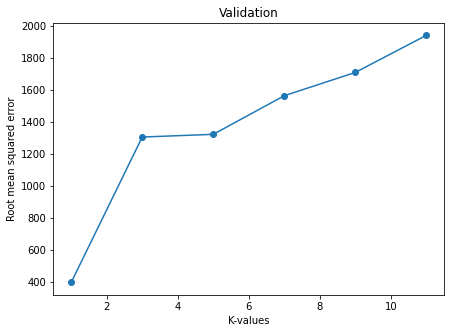

The optimal k value (validation) is k=1


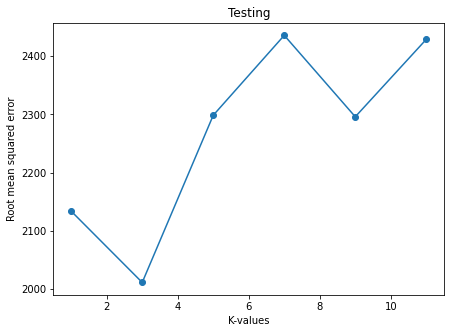

The optimal k value (testing) is k=3
The training/validation error of the validated k is 396.8
The test error of the validated k is 2133.95


In [498]:
cross_validate(df,random_state=None)

The optimal k values do tend to differ for the validation and testing periods. The train and test datasets are being randomly split and variance between the datasets can cause this issue.

### L0 regularisation

In [242]:
def distance(train,test,dist_type, lambd=1):
    
    #nominal values
    nom_dist=np.sum(train[:,15:]!=test[15:],axis=1)
    #continuous values
    if dist_type=='Euclidian':
        squared_dist=(train[:,:15]-test[:15])**2
        cont_dist=np.sum(np.sqrt(squared_dist.astype(float)), axis=1)
    if dist_type=='Manhattan':
        abs_dist=abs(train[:,:15]-test[:15])**2
        cont_dist=np.sum(abs_dist, axis=1)
    l0=np.sum(train!=0, axis=1)
        
    return cont_dist+nom_dist + (lambd * l0)

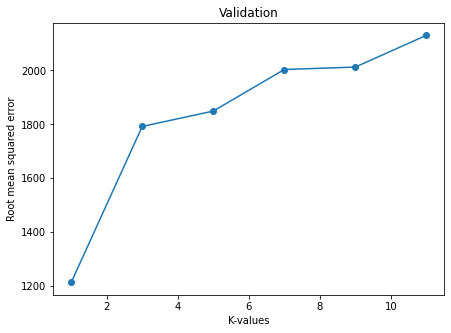

The optimal k value (validation) is k=1


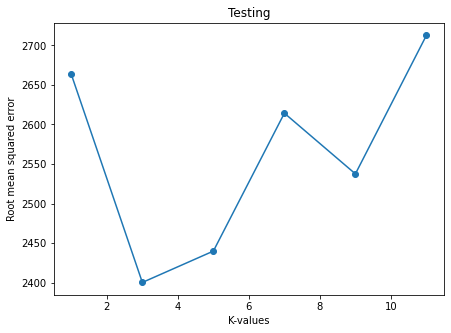

The optimal k value (testing) is k=3
The training/validation error of the validated k is 1213.62
The test error of the validated k is 2663.31


In [243]:
cross_validate(df,random_state=21)

The l0 norm does not seem to help in generalisation. The validation distributions are similar but the noise is increased in the test distribution.  The l0 norm is being added as a constant for each training dataset, and since the training dataset is not optimised depending on the loss, adding the norm has no effect.

### Feature importance

In [499]:
scores=np.array([0]*24)
ratio_dist=np.array([0.0]*24)
for i in range(20):

    X_train,X_test,y_train,y_test=train_test_split(df)
    dist_type='Euclidian'
    
    for i in range(len(X_test)):
        #nominal values
        nom_dist= (X_train[:,15:]!=X_test[i][15:])
        #continuous values
        squared_dist=(X_train[:,:15]-X_test[i][:15])**2
        cont_dist=np.sqrt(squared_dist.astype(float))

        d=np.hstack((cont_dist,nom_dist))
        d_sum=np.sum(nom_dist,axis=1) + np.sum(cont_dist,axis=1)

        neighbours_dist=d[np.argsort(d_sum)][:10]     #distance from closest neighbours 
        random_dist=d[np.random.choice(np.arange(10,len(d)),size=len(neighbours_dist))]    #distance from random points 

        ratio_dist+=np.sum(neighbours_dist,axis=0)/(np.sum(random_dist,axis=0)+1)  #ratio of neighbours to random distances

order=np.argsort(ratio_dist) #lower ratios indicate better prediction since they 'pull' the test point towards them  
print('The order of the features in terms of their prediction power is:')
for i in range(len(df.columns[:-1])):
    print(f'{i+1}. {df.columns[:-1][order][i]}')

The order of the features in terms of their prediction power is:
1. engine-location
2. fuel-type
3. compression-ratio
4. drive-wheels
5. num-of-cylinders
6. fuel-system
7. engine-size
8. aspiration
9. horsepower
10. curb-weight
11. wheel-base
12. num-of-doors
13. length
14. city-mpg
15. highway-mpg
16. width
17. engine-type
18. stroke
19. bore
20. height
21. symboling
22. peak-rpm
23. body-style
24. make


The results are mostly intuitive such that features like fuel-type, engine-location, aspiration and wheel drive which usually differ in high-end and low-end cars have a higher weightage. Features like height and width which can vary across the different price ranges also have lower importance in the model. However certain features like the make of the car, the style of the body and miles per gallon values which are usually good estimates of the price of the car are not very important in the model. Even for the automobile-naive, make and body-style features would seem to be the primary predictors of price. Further explorations of the dataset and using different ML models could indicate whether this finding is a statistical artifact or if such features are not good predictors of automobile price.  

In [500]:
df.corrwith(df['price']).sort_values()

highway-mpg         -0.719178
city-mpg            -0.706618
peak-rpm            -0.103835
symboling           -0.084835
compression-ratio    0.074483
stroke               0.096007
height               0.136234
bore                 0.546295
wheel-base           0.584951
length               0.695928
num-of-cylinders     0.746007
width                0.754649
horsepower           0.812453
curb-weight          0.835368
engine-size          0.888778
price                1.000000
dtype: float64

Looking at the correlation for the continuous values, features like miles per-gallon, length and width seem to be good predictors but haven't been given high importance in the model. Horsepower, engine-size and curb-weight should also be given higher importance in the model judging by the strong correlations. Compression-ratio is also given higher importance in the model but has low correlations with price in the dataset. The model however behaves conventionally by placing higher importance to features like number of cyclinders which has a stronger correlation and lower importance to stroke, symboling, hieght and peak-rpm which have weaker correlations. Overall, despite the knn-model predicting prices with a reasonable accuracy, seems to behave in an inconsistent manner with respect to the dataset correlations for the continuous values. An analysis of the categorical vairables could shed further light on the story.

# Question 2

In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

df=pd.read_csv('adult.csv')
df['income']=df['income'].replace({'<=50K':1,'>50K':-1})

for col in df.columns:
    df=df[df[col]!='?'] 
    df=df[df[col]!='NaN']    
df=df.drop(columns=['education']) #unecessary

df=df.reset_index(drop=True)
df=pd.concat([df.select_dtypes('object'),df.select_dtypes('int64')], axis=1)  #sort by datatype

df

C:\Users\samru\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,workclass,marital.status,occupation,relationship,race,sex,native.country,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,Private,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,82,132870,9,0,4356,18,1
1,Private,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,54,140359,4,0,3900,40,1
2,Private,Separated,Prof-specialty,Own-child,White,Female,United-States,41,264663,10,0,3900,40,1
3,Private,Divorced,Other-service,Unmarried,White,Female,United-States,34,216864,9,0,3770,45,1
4,Private,Separated,Adm-clerical,Unmarried,White,Male,United-States,38,150601,6,0,3770,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,Private,Never-married,Protective-serv,Not-in-family,White,Male,United-States,22,310152,10,0,0,40,1
30158,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,27,257302,12,0,0,38,1
30159,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,40,154374,9,0,0,40,-1
30160,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,58,151910,9,0,0,40,1


In [249]:
def train_test_split(df,p=0.8,random_state=None):

    df_split=df.sample(frac=1,random_state=random_state)   #shuffle
    split_val=int(len(df_split)*(p))   #split into train and test
    n=len(df_split.columns)  #number of features

    X_train=df_split[:split_val].to_numpy()[:,:n-1]
    y_train=df_split[:split_val].to_numpy()[:,n-1]
    X_test=df_split[split_val:].to_numpy()[:,:n-1]
    y_test=df_split[split_val:].to_numpy()[:,n-1]
    
    return X_train,X_test,y_train,y_test

In [509]:
class Node:
    # A node stores its own depth (root = depth 0), its decision stump, its parent and child information
    # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, stump = (0,0), parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    # Get the entropy of a node with nPos positive points and nNeg negative points
    def getEntropy( self, nPos, nNeg ):
        if nPos==0 or nNeg==0:
            entropy=0
        else:
            nTot = nPos + nNeg
            # Find the proportion of the positives and negatives in that node
            pPos = nPos/nTot
            pNeg = nNeg/nTot
            # The smaller the entropy the purer the node
            entropy = - (pPos* np.log2(pPos)) - (pNeg* np.log2(pNeg))
        return entropy
    
    def getStump( self, X, y ):  
        bestEntropy=1
        bestFeat= None
        bestThres=None
        n = len(y)      
        
        for i in range(len(X[0])):  
            # Do not use the same feature as used by the parent node
            if (self.parent is not None and i == self.parent.stump[0]) or i==8: #saving time
                continue
                
            if type(X[0][i]) ==str:
                
                candidateThresholds=np.unique(X[:,i])   #all the unique values are taken as candidate thresholds
                entropies=0                             
                for j in range (len(candidateThresholds)):
                    
                    idx1=np.where(X[:,i]==candidateThresholds[j])  #data is split by candidate threshold vs all other thresholds
                    idx2=np.where(X[:,i]!=candidateThresholds[j])
                               
                    nPos1=sum(y[idx1]==1)   #positive and negative y values in the two groups
                    nNeg1=sum(y[idx1]==-1)
                    nPos2=sum(y[idx2]==1) 
                    nNeg2=sum(y[idx2]==-1)
                    
                    #sum of entropies in each group
                    entropies= ( self.getEntropy( nPos1, nNeg1 ) * ((nPos1+nNeg1)/n) ) +( self.getEntropy( nPos2, nNeg2 ) * ((nPos2+nNeg2)/n) )  

                    if entropies<bestEntropy:
                        bestEntropy=entropies
                        bestFeat= i
                        bestThres= candidateThresholds[j]

            elif type(X[0][i]) ==int or type(X[0][i]) ==float: 
                # Find out all values at which we can threshold that feature
                candidateThresholds = np.sort( X[:, i] )
                idx = np.argsort( X[:, i] )
                # The cumulative sum trick used here will work only if labels are binary 
                ySorted = y[idx]
                yCum = np.cumsum( ySorted )
                yCumRev = np.cumsum( ySorted[::-1] )[::-1]
                # For each possible threshold (except the ones at the extreme)
                for j in range( 1, candidateThresholds.size-1 ):

                    nPos1=(yCum[j] + j+1)/2
                    nNeg1=(j+1 - yCum[j])/2
                    nPos2=(yCumRev[j+1] + n-j-1)/2
                    nNeg2=(n-j-1 - yCumRev[j+1])/2
                    entropies= ( self.getEntropy( nPos1, nNeg1 ) * ((nPos1+nNeg1)/n) ) +( self.getEntropy( nPos2, nNeg2 ) * ((nPos2+nNeg2)/n) ) 

                    if entropies<bestEntropy:
                        bestEntropy=entropies
                        bestFeat= i
                        bestThres= candidateThresholds[j]
                        
        return (bestFeat, bestThres)
    
    def train( self, X, y, maxLeafSize, maxDepth ):
        # If too few data points are present, or else if this node is too deep in the tree, make this a leaf
        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.label = np.sign(sum( y ))  #majority label
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump
            self.stump = self.getStump( X, y )
            
            self.left = Node( depth = self.depth + 1, parent = self )
            self.right = Node( depth = self.depth + 1, parent = self )
            # Find which points go to my left child and which go to my right child
            
            if type(self.stump[1])==int or type(self.stump[1])==float:  #continuous values, greater/ lesser than check
                discriminant = X[:, self.stump[0]] - self.stump[1]
                # Train my two children recursively
                self.left.train( X[discriminant <= 0, :], y[discriminant <= 0], maxLeafSize, maxDepth )
                self.right.train( X[discriminant > 0, :], y[discriminant > 0], maxLeafSize, maxDepth )
                
            elif type(self.stump[1])==str:  #categorical values, equality check
                idx1=np.where(X[:,self.stump[0]]!=self.stump[1])        
                idx2=np.where(X[:,self.stump[0]]==self.stump[1])
                # Train my two children recursively
                self.left.train( X[idx1], y[idx1], maxLeafSize, maxDepth )
                self.right.train( X[idx2], y[idx2], maxLeafSize, maxDepth )
    
    def predict( self, data ):
        # If I am a leaf I can predict rightaway
          if self.isLeaf:
              return self.label
          # Else I have to ask one of my children to do the job
          else:
              if type(self.stump[1])==int: #continuous
                  if data[self.stump[0]]>self.stump[1]:
                      return self.right.predict( data )
                  else:
                      return self.left.predict( data )
              elif type(self.stump[1])==str:  #nominal
                  if data[self.stump[0]]==self.stump[1]:
                      return self.right.predict( data )
                  else:
                      return self.left.predict( data )
                        
                        
class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, test ):
        return self.root.predict( test )
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )

In [510]:
def DecisionTree(X_train,X_test,y_train,y_test, maxLeafSize = 5,  maxDepth = 4 ):
  DT = Tree( maxLeafSize = maxLeafSize , maxDepth = maxDepth )  #initialise tree
  DT.train( X_train, y_train )  #train tree

  pred=[]                             #predictions
  for i in range(len(X_test)):
    yhat=DT.predict(X_test[i])
    pred.append([yhat,y_test[i]])
  
  pred=np.array(pred)
  accuracy=sum(pred[:,0]==pred[:,1])/len(pred)

  return round(accuracy*100,2)

In [511]:
X_train,X_test,y_train,y_test=train_test_split(df, random_state=None)
acc=DecisionTree(X_train,X_test,y_train,y_test,maxLeafSize=4,maxDepth=4)
print(f'Accuracy on the dataset is {acc} %')

Accuracy on the dataset is 83.74 %


The tree is performing with high accuracy on the dataset

### Cross validation

In [512]:
def k_fold(X_train_og,y_train_og,maxLeafSize,maxDepth,k_fold=10):
    preds=[]

    for i in range(k_fold): 

        X=copy.deepcopy(X_train_og)
        y=copy.deepcopy(y_train_og)

        start=i*int(len(X_train_og)/k_fold)
        end=(i+1)*int(len(X_train_og)/k_fold)

        X_validate=X[start:end]
        y_validate=y[start:end]

        X_train=np.delete(X,np.arange(start,end),0)
        y_train=np.delete(y,np.arange(start,end),0)

        acc=DecisionTree(X_train,X_test,y_train,y_test,maxLeafSize,maxDepth)
        preds.append(acc)

    return np.array(preds)

In [513]:
def cross_validate(df,random_state=None):

    X_train_og,X_test,y_train_og,y_test=train_test_split(df, random_state=random_state)  

    maxLeafVals=np.arange(1,10)
    maxDepthVals=np.arange(1,10)
    val_accuracies=[]

    for l in maxLeafVals:
        for d in maxDepthVals:
            acc=k_fold(X_train_og,y_train_og,maxLeafSize=l,maxDepth=d,k_fold=5)
            val_accuracies.append([np.mean(acc),l,d])

    val_accuracies=np.array(val_accuracies)
    sorted_acc=val_accuracies[val_accuracies[:, 0].argsort()]
    top_accuracies=sorted_acc[:,1:3][-10:]

    test_accuracies=[]
    for top in top_accuracies:
        l,d=top
        acc=DecisionTree(X_train_og,X_test,y_train_og,y_test, maxLeafSize = l,  maxDepth = d )
        test_accuracies.append([acc,l,d])

    test_accuracies=np.array(test_accuracies) 
    sorted_test_acc=test_accuracies[test_accuracies[:, 0].argsort()]

    fig,axs=plt.subplots(2,2, figsize=(12,8), sharey=True)

    axs[0][0].plot(val_accuracies[:,1],val_accuracies[:,0],'o')
    axs[0][1].plot(val_accuracies[:,2],val_accuracies[:,0],'o')

    axs[0][0].set_ylabel('Accuracy')
    axs[0][1].set_ylabel('Accuracy')

    axs[0][0].set_xlabel('Validation max leaf size')
    axs[0][1].set_xlabel('Validation max depth')

    axs[1][0].plot(test_accuracies[:,1],test_accuracies[:,0],'o')
    axs[1][1].plot(test_accuracies[:,2],test_accuracies[:,0],'o')

    axs[1][0].set_ylabel('Accuracy')
    axs[1][1].set_ylabel('Accuracy')

    axs[1][0].set_xlabel('Testing max leaf size')
    axs[1][1].set_xlabel('Testing max depth')

    fig.show()

    print(f'The optimal cross-validated depth and leaf sizes are {sorted_acc[-1][1]} and {sorted_acc[-1][2]}')
    print(f'The highest validation accuracy is {sorted_acc[-1][0]} test accuracy is {sorted_test_acc[-1][0]}')

**Please run the next cell only if you have the computational resources.**  
You can also change the parameters to make the training less expensive.  
The results run on Google colab are presented below:

The optimal cross-validated depth and leaf sizes are 6.0 and 9.0
The highest validation accuracy is 85.584 test accuracy is 85.55


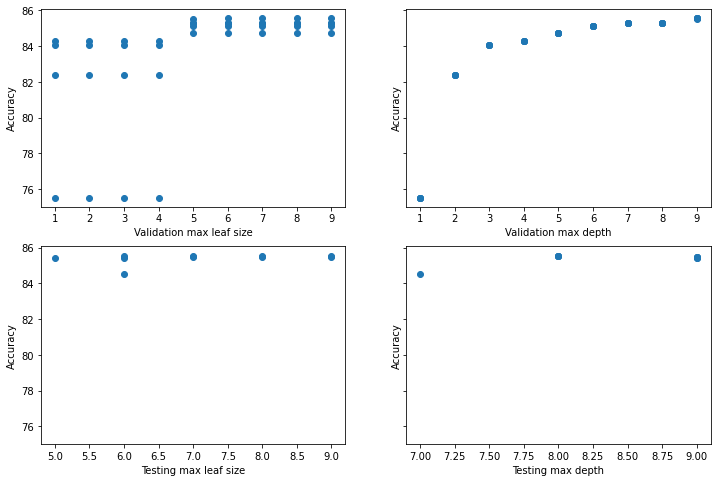

In [201]:
cross_validate(df,random_state=None)

The validation and test accuracies are similair and there is no overfitting. Maximum Depth seems to be a better predictor of accuracy values compared to Maximum Leaf size. There seeems to be a plateau of accuracy for the higher depth and leaf size values

### Complex splitting 

In [516]:
class Node:
    # A node stores its own depth (root = depth 0), its decision stump, its parent and child information
    # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, stump = [], parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    # Get the entropy of a node with nPos positive points and nNeg negative points
    def getEntropy( self, nPos, nNeg ):
        if nPos==0 or nNeg==0:
            entropy=0
        else:
            nTot = nPos + nNeg
            # Find the proportion of the positives and negatives in that node
            pPos = nPos/nTot
            pNeg = nNeg/nTot
            # The smaller the entropy the purer the node
            entropy = - (pPos* np.log2(pPos)) - (pNeg* np.log2(pNeg))
        return entropy
    
    def getStump( self, X, y ):  
        
        #prototypes are used as splitting criteria
        XPos=X[y>0]         
        XNeg=X[y<0]

        cPos=np.sum(XPos[:,7:], axis=0)/ (len(XPos[:,7:])+1)   #mean of continuous values
        cNeg=np.sum(XNeg[:,7:], axis=0)/ (len(XNeg[:,7:])+1)

        nPos=[]                                                #mean of categorical values
        nNeg=[]
        for i in range(0,7):
          v,c=np.unique(XPos[:,i], return_counts=True)
          mode=v[np.argmax(c)]
          nPos.append(mode)
          v,c=np.unique(XNeg[:,i], return_counts=True)
          mode=v[np.argmax(c)]
          nNeg.append(mode)

        PPos=np.concatenate([nPos,cPos])             #final prototypes
        PNeg=np.concatenate([nNeg,cNeg])
                        
        return [PPos,PNeg]
    
    def train( self, X, y, maxLeafSize, maxDepth ):
        # If too few data points are present, or else if this node is too deep in the tree, make this a leaf
        if y.size < maxLeafSize or self.depth >= maxDepth or len(X[y>0])<2 or len(X[y<0])<2 : #minimal values of classes
            self.isLeaf = True
            self.label = np.sign(sum( y ))
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump
            self.stump = self.getStump( X, y )
            PPos,PNeg=self.stump

            dPos1=np.sum(PPos[:7]==X[:,:7],axis=1)                  
            l2_dist=(PPos[7:]-X[:,7:])**2                            #euclidian distance
            dPos2=np.sum(np.sqrt(l2_dist.astype(float)),axis=1)
            dPos=dPos1+dPos2                                         #distance from class 1

            dNeg1=np.sum(PNeg[:7]==X[:,:7],axis=1)
            l2_dist=(PNeg[7:]-X[:,7:])**2
            dNeg2=np.sum(np.sqrt(l2_dist.astype(float)),axis=1)
            dNeg=dNeg1+dNeg2                                        #distance from class -1

            self.left = Node( depth = self.depth + 1, parent = self )
            self.right = Node( depth = self.depth + 1, parent = self )
            # Find which points go to my left child and which go to my right child

            self.left.train( X[(dPos>dNeg)], y[(dPos>dNeg)], maxLeafSize, maxDepth )
            self.right.train( X[(dPos<dNeg)], y[(dPos<dNeg)], maxLeafSize, maxDepth )
    
    def predict( self, data):
        # If I am a leaf I can predict rightaway
          if self.isLeaf:
              return self.label
          # Else I have to ask one of my children to do the job
          else:
              PPos,PNeg=self.stump
                
              dPos1=np.sum(PPos[:7]==data[:7])
              l2_dist=(PPos[7:]-data[7:])**2
              dPos2=np.sum(np.sqrt(l2_dist.astype(float)))
              dPos=dPos1+dPos2                          

              dNeg1=np.sum(PNeg[:7]==data[:7])
              l2_dist=(PNeg[7:]-data[7:])**2
              dNeg2=np.sum(np.sqrt(l2_dist.astype(float)))
              dNeg=dNeg1+dNeg2

              if (dPos>dNeg):
                    return self.left.predict( data )
              else:
                    return self.right.predict( data )
                
                        
class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, test ):
        return self.root.predict( test )
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )

In [517]:
X_train,X_test,y_train,y_test=train_test_split(df, random_state=None)
acc=DecisionTree(X_train,X_test,y_train,y_test,maxLeafSize=4,maxDepth=4)
print(f'Accuracy on the dataset is {acc} %')

Accuracy on the dataset is 78.87 %


Despite the splitting criteria considering distance from all the features, accuracy is lower than the single split feature. The algorithm however executes much faster. Accuracy could be improved by changing the distance calculation to a weighted Euclidian or a Mahalanobis distance. A knn classifier can also be used at the leaf nodes instead of returning the majority label

### References

Slides and demo code from the CS771 class have been used for the two questions.  
Calculation of the importance of the features in the knn classifier has been done using an idea from one of the unsung heroes on stack overflow. (https://stackoverflow.com/questions/55314345/how-to-find-feature-importance-or-variable-importance-graph-for-knnclassifier)